In [1]:
import keras.metrics
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Flatten
from keras.utils import image_dataset_from_directory
import pandas as pd

import os, shutil
from PIL import Image
import random

import pickle

from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

print (len(tf.config.experimental.list_physical_devices('GPU')))

1


In [2]:
base_dir = "../dataset/"
img_folder = os.path.join(base_dir, 'segment4/')
train_imgs = os.path.join(img_folder, 'train/')

In [3]:
classes = ['c0', 'c1', 'c2', 'c7']

class_def = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c7': 'reaching behind'}

In [4]:
image_size = (224, 224)
validation_split= 0.20
batch_size = 32
train_dir = "dataset/segment4/train/"

train_set = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                             labels = 'inferred',
                                                             label_mode='categorical',
                                                             image_size=image_size,
                                                             batch_size=batch_size,
                                                             seed=1,
                                                             shuffle=True,
                                                             validation_split=0.20,
                                                             subset='training')
val_set = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                             labels = 'inferred',
                                                             label_mode='categorical',
                                                             image_size=image_size,
                                                             batch_size=batch_size,
                                                             seed=1,
                                                             shuffle=True,
                                                             validation_split=0.20,
                                                             subset='validation')

Found 4000 files belonging to 4 classes.
Using 3200 files for training.
Found 4000 files belonging to 4 classes.
Using 800 files for validation.


In [5]:
def normalize(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_set = train_set.map(normalize)
val_set = val_set.map(normalize)

In [6]:
model_5 = Sequential ([
    Conv2D(128, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [7]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [8]:
model_5.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [9]:
history = model_5.fit(
train_set,
steps_per_epoch=len(train_set),
epochs=5,
validation_data=val_set,
validation_steps=len(val_set))

Epoch 1/5
100/100 [==============================] - 19s 119ms/step - loss: 0.7331 - accuracy: 0.6781 - val_loss: 0.0960 - val_accuracy: 0.9600
Epoch 2/5
100/100 [==============================] - 12s 117ms/step - loss: 0.0760 - accuracy: 0.9794 - val_loss: 0.0503 - val_accuracy: 0.9825
Epoch 3/5
100/100 [==============================] - 12s 117ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0233 - val_accuracy: 0.9925
Epoch 4/5
100/100 [==============================] - 12s 116ms/step - loss: 0.0258 - accuracy: 0.9909 - val_loss: 0.0263 - val_accuracy: 0.9887
Epoch 5/5
100/100 [==============================] - 12s 116ms/step - loss: 0.0214 - accuracy: 0.9944 - val_loss: 0.0142 - val_accuracy: 0.9950


In [10]:
model_5.save_weights('4classes_CNN Distracted driver weights.h5', overwrite=True)

In [11]:
pickle.dump(model_5, open("model_5.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://4d0eda7a-4e7e-486f-b31f-4ee25c4171d4/assets


INFO:tensorflow:Assets written to: ram://4d0eda7a-4e7e-486f-b31f-4ee25c4171d4/assets


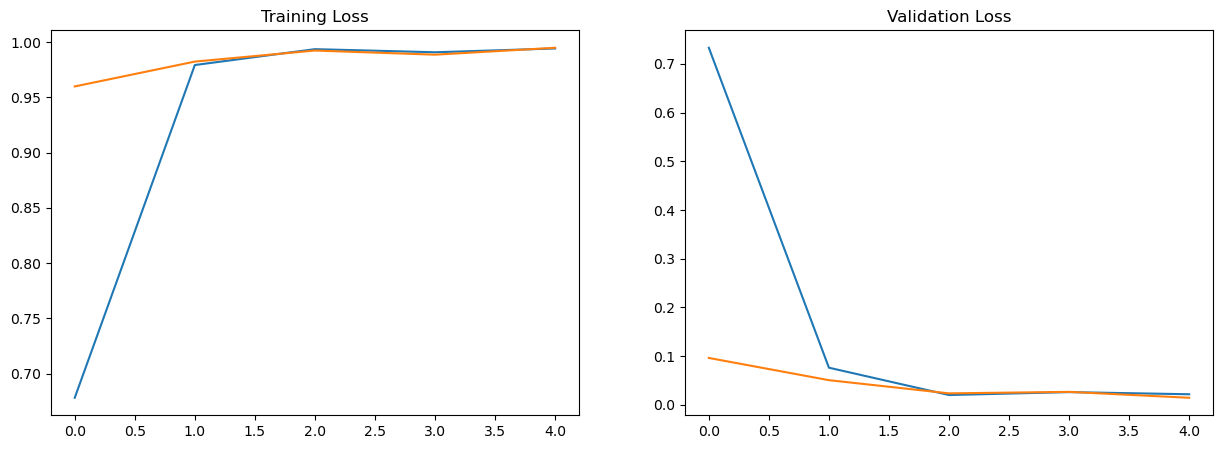

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Training Loss')
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])

ax[1].set_title('Validation Loss')
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])

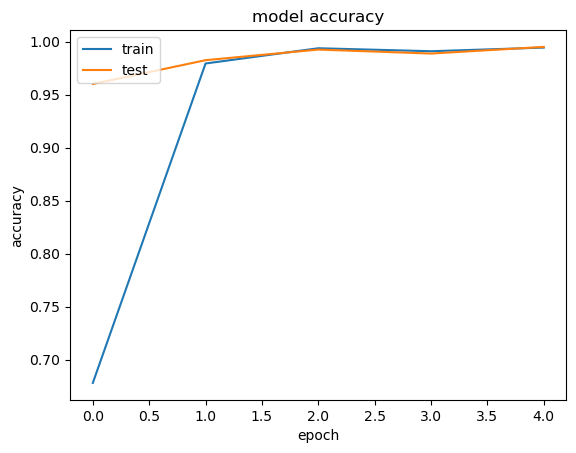

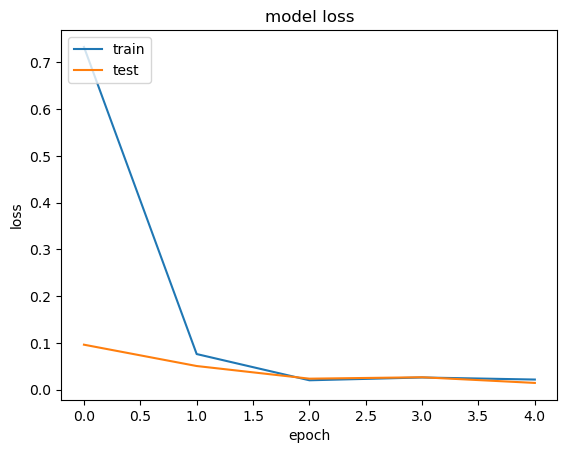

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()